In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

In [2]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")

In [3]:
tesla_stock.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [4]:
tesla_stock.reset_index(inplace=True)
tesla_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3908,2026-01-12 00:00:00-05:00,441.230011,454.299988,438.000000,448.959991,61649600,0.0,0.0
3909,2026-01-13 00:00:00-05:00,450.200012,451.809998,443.950012,447.200012,53719200,0.0,0.0
3910,2026-01-14 00:00:00-05:00,442.809998,443.910004,434.220001,439.200012,57259500,0.0,0.0
3911,2026-01-15 00:00:00-05:00,441.130005,445.359985,437.649994,438.570007,49465800,0.0,0.0


In [5]:
tesla_stock = tesla_stock[["Date", "Close"]]
tesla_stock.rename(columns={"Close": "Stock Price"}, inplace=True)

/var/folders/n1/p6cjd75979s6d38vw1q_yrw00000gn/T/ipykernel_12565/1088573666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock.rename(columns={"Close": "Stock Price"}, inplace=True)


In [6]:
tesla_stock.dtypes

Date           datetime64[ns, America/New_York]
Stock Price                             float64
dtype: object

In [7]:
tesla_stock["Date"] = tesla_stock["Date"].dt.tz_localize(None)
tesla_stock.dropna(inplace=True)
tesla_stock = tesla_stock[tesla_stock["Stock Price"] > 0]

/var/folders/n1/p6cjd75979s6d38vw1q_yrw00000gn/T/ipykernel_12565/4170533819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock["Date"] = tesla_stock["Date"].dt.tz_localize(None)
/var/folders/n1/p6cjd75979s6d38vw1q_yrw00000gn/T/ipykernel_12565/4170533819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stock.dropna(inplace=True)


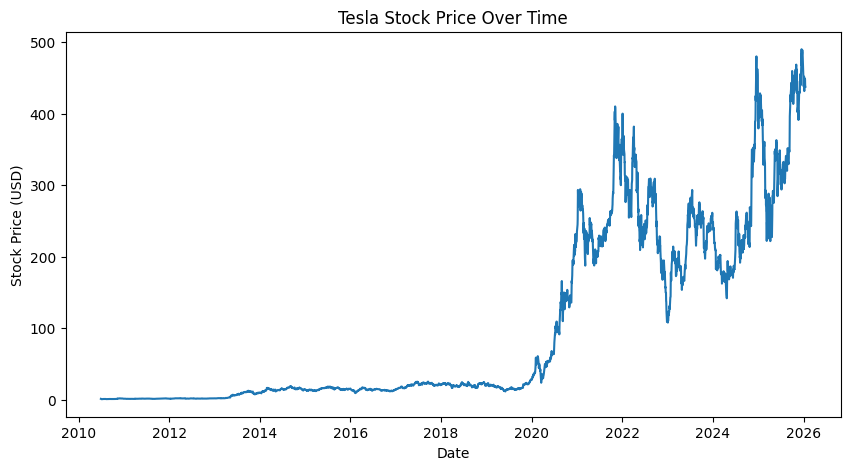

In [8]:
plt.figure(figsize=(10,5))
plt.plot(tesla_stock["Date"], tesla_stock["Stock Price"])
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.show()

In [9]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0 Safari/537.36"
}

html_data = requests.get(url, headers=headers).text
len(html_data)

64208

In [10]:
tables = pd.read_html(html_data)
len(tables)

/var/folders/n1/p6cjd75979s6d38vw1q_yrw00000gn/T/ipykernel_12565/239674234.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


4

In [11]:
tesla_revenue = tables[1].copy()
tesla_revenue.head()

,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
0,2025-09-30,"$28,095"
1,2025-06-30,"$22,496"
2,2025-03-31,"$19,335"
3,2024-12-31,"$25,707"
4,2024-09-30,"$25,182"


In [12]:
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Revenue"] = (
    tesla_revenue["Revenue"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.dropna(inplace=True)

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(float)

tesla_revenue.head()

,Date,Revenue
0,2025-09-30,28095.0
1,2025-06-30,22496.0
2,2025-03-31,19335.0
3,2024-12-31,25707.0
4,2024-09-30,25182.0


**GME STOCK

In [13]:
gamestop = yf.Ticker("GME")
gme_stock = gamestop.history(period="max")

In [14]:
gme_stock.reset_index(inplace=True)
gme_stock = gme_stock[["Date", "Close"]]
gme_stock.rename(columns={"Close": "Stock Price"}, inplace=True)

In [15]:
gme_stock["Date"] = gme_stock["Date"].dt.tz_localize(None)
gme_stock.dropna(inplace=True)
gme_stock = gme_stock[gme_stock["Stock Price"] > 0]

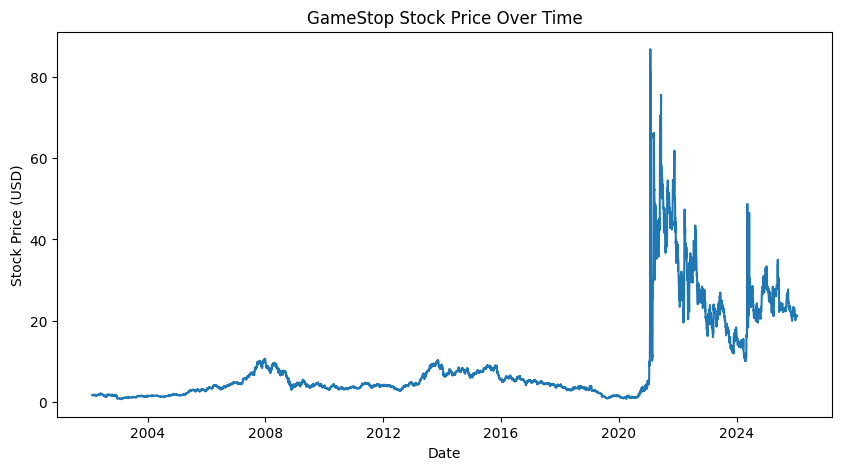

In [16]:
plt.figure(figsize=(10,5))
plt.plot(gme_stock["Date"], gme_stock["Stock Price"])
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.show()

In [17]:
gme_stock.dtypes

Date           datetime64[ns]
Stock Price           float64
dtype: object

In [18]:
gme_stock.head()

,Date,Stock Price
0,2002-02-13,1.691666
1,2002-02-14,1.683250
2,2002-02-15,1.674834
3,2002-02-19,1.607504
4,2002-02-20,1.662210


In [19]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0 Safari/537.36"
}

html_data = requests.get(url, headers=headers).text
len(html_data)

73708

In [20]:
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables and pick the one that contains "Quarterly Revenue" in the header
tables = soup.find_all("table")

target_table = None
for table in tables:
    th = table.find("th")
    if th and "Quarterly Revenue" in th.get_text():
        target_table = table
        break

target_table is not None

True

In [21]:
gme_revenue = pd.read_html(str(target_table))[0]
gme_revenue.head()

/var/folders/n1/p6cjd75979s6d38vw1q_yrw00000gn/T/ipykernel_12565/886547021.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(target_table))[0]


,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
0,2025-10-31,$821
1,2025-07-31,$972
2,2025-04-30,$732
3,2025-01-31,"$1,283"
4,2024-10-31,$860


In [22]:
gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
)

gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.dropna(inplace=True)

gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)

gme_revenue.head()

,Date,Revenue
0,2025-10-31,821.0
1,2025-07-31,972.0
2,2025-04-30,732.0
3,2025-01-31,1283.0
4,2024-10-31,860.0


In [23]:
tesla_stock.sort_values("Date", inplace=True)
tesla_revenue.sort_values("Date", inplace=True)

gme_stock.sort_values("Date", inplace=True)
gme_revenue.sort_values("Date", inplace=True)

In [24]:
tesla_stock_filtered = tesla_stock[
    (tesla_stock["Date"] >= tesla_revenue["Date"].min()) &
    (tesla_stock["Date"] <= tesla_revenue["Date"].max())
]

gme_stock_filtered = gme_stock[
    (gme_stock["Date"] >= gme_revenue["Date"].min()) &
    (gme_stock["Date"] <= gme_revenue["Date"].max())
]

In [25]:
tesla_stock_filtered.shape, gme_stock_filtered.shape

((3647, 2), (3712, 2))

In [26]:
fig = make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=["Tesla: Stock Price vs Quarterly Revenue"]
)

In [27]:
fig.add_trace(
    go.Scatter(
        x=tesla_stock_filtered["Date"],
        y=tesla_stock_filtered["Stock Price"],
        name="Stock Price",
        line=dict(color="blue")
    ),
    secondary_y=False
)

In [28]:
fig.add_trace(
    go.Scatter(
        x=tesla_revenue["Date"],
        y=tesla_revenue["Revenue"],
        name="Quarterly Revenue",
        mode="lines+markers",
        line=dict(color="green")
    ),
    secondary_y=True
)

In [29]:
fig.update_layout(
    title="Tesla Stock Price vs Revenue",
    xaxis_title="Date",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig.update_yaxes(
    title_text="Stock Price (USD)",
    secondary_y=False
)

fig.update_yaxes(
    title_text="Revenue (Millions USD)",
    secondary_y=True
)

In [30]:
fig.show()

In [31]:
fig_gme = make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=["GameStop: Stock Price vs Quarterly Revenue"]
)

In [32]:
fig_gme.add_trace(
    go.Scatter(
        x=gme_stock_filtered["Date"],
        y=gme_stock_filtered["Stock Price"],
        name="Stock Price",
        line=dict(color="blue")
    ),
    secondary_y=False
)

In [33]:
fig_gme.add_trace(
    go.Scatter(
        x=gme_revenue["Date"],
        y=gme_revenue["Revenue"],
        name="Quarterly Revenue",
        mode="lines+markers",
        line=dict(color="green")
    ),
    secondary_y=True
)

In [34]:
fig_gme.update_layout(
    title="GameStop Stock Price vs Revenue",
    xaxis_title="Date",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig_gme.update_yaxes(
    title_text="Stock Price (USD)",
    secondary_y=False
)

fig_gme.update_yaxes(
    title_text="Revenue (Millions USD)",
    secondary_y=True
)

In [35]:
fig_gme.show()

In [36]:
fig_all = make_subplots(
    rows=2, cols=1,
    specs=[[{"secondary_y": True}], [{"secondary_y": True}]],
    subplot_titles=("Tesla: Stock Price vs Quarterly Revenue",
                    "GameStop: Stock Price vs Quarterly Revenue"),
    vertical_spacing=0.12
)

In [37]:
fig_all.add_trace(
    go.Scatter(
        x=tesla_stock_filtered["Date"],
        y=tesla_stock_filtered["Stock Price"],
        name="TSLA Stock Price",
        line=dict(color="blue")
    ),
    row=1, col=1, secondary_y=False
)

In [38]:
fig_all.add_trace(
    go.Scatter(
        x=tesla_revenue["Date"],
        y=tesla_revenue["Revenue"],
        name="TSLA Revenue",
        mode="lines+markers",
        line=dict(color="green")
    ),
    row=1, col=1, secondary_y=True
)

In [39]:
fig_all.add_trace(
    go.Scatter(
        x=gme_stock_filtered["Date"],
        y=gme_stock_filtered["Stock Price"],
        name="GME Stock Price",
        line=dict(color="blue")
    ),
    row=2, col=1, secondary_y=False
)

In [40]:
fig_all.add_trace(
    go.Scatter(
        x=gme_revenue["Date"],
        y=gme_revenue["Revenue"],
        name="GME Revenue",
        mode="lines+markers",
        line=dict(color="green")
    ),
    row=2, col=1, secondary_y=True
)

In [41]:
fig_all.update_layout(
    title="Tesla vs GameStop: Stock Price vs Quarterly Revenue",
    template="plotly_white",
    height=900,
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="left", x=0)
)

# Y-axis titles (row 1)
fig_all.update_yaxes(title_text="Stock Price (USD)", row=1, col=1, secondary_y=False)
fig_all.update_yaxes(title_text="Revenue (Millions USD)", row=1, col=1, secondary_y=True)

# Y-axis titles (row 2)
fig_all.update_yaxes(title_text="Stock Price (USD)", row=2, col=1, secondary_y=False)
fig_all.update_yaxes(title_text="Revenue (Millions USD)", row=2, col=1, secondary_y=True)

# X-axis titles
fig_all.update_xaxes(title_text="Date", row=2, col=1)

In [42]:
fig_all.show()